<a href="https://colab.research.google.com/github/djyothsna29/Hackathon/blob/main/hackathon_1RN18IS056.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import pandas as pd
df = pd.read_csv('Heart_Disease_Data.csv', na_values='?')
print(df.head())

   age  sex  cp  trestbps  chol  ...  oldpeak  slop   ca  thal  pred_attribute
0   63    1   1       145   233  ...      2.3     3  0.0   6.0               0
1   67    1   4       160   286  ...      1.5     2  3.0   3.0               2
2   67    1   4       120   229  ...      2.6     2  2.0   7.0               1
3   37    1   3       130   250  ...      3.5     3  0.0   3.0               0
4   41    0   2       130   204  ...      1.4     1  0.0   3.0               0

[5 rows x 14 columns]


In [225]:
print(df.shape)

(303, 14)


In [226]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute'],
      dtype='object')

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   cp              303 non-null    int64  
 3   trestbps        303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalach         303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slop            303 non-null    int64  
 11  ca              299 non-null    float64
 12  thal            301 non-null    float64
 13  pred_attribute  303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [228]:
df.nunique()

age                41
sex                 2
cp                  4
trestbps           50
chol              152
fbs                 2
restecg             3
thalach            91
exang               2
oldpeak            40
slop                3
ca                  4
thal                3
pred_attribute      5
dtype: int64

In [229]:
df.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                4
thal              2
pred_attribute    0
dtype: int64

In [230]:
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

In [231]:
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [233]:
df.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
dtype: int64

count    303.000000
mean       0.937294
std        1.228536
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        4.000000
Name: pred_attribute, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


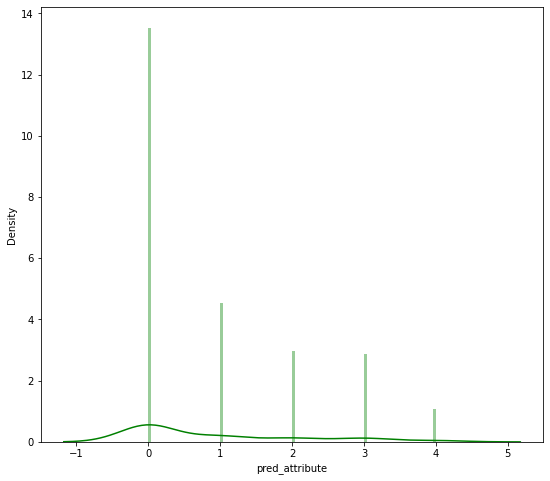

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df['pred_attribute'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['pred_attribute'], color='g', bins=100, hist_kws={'alpha': 0.4});

Text(0.5, 1.0, 'Heart Disease Frequency for Ages')

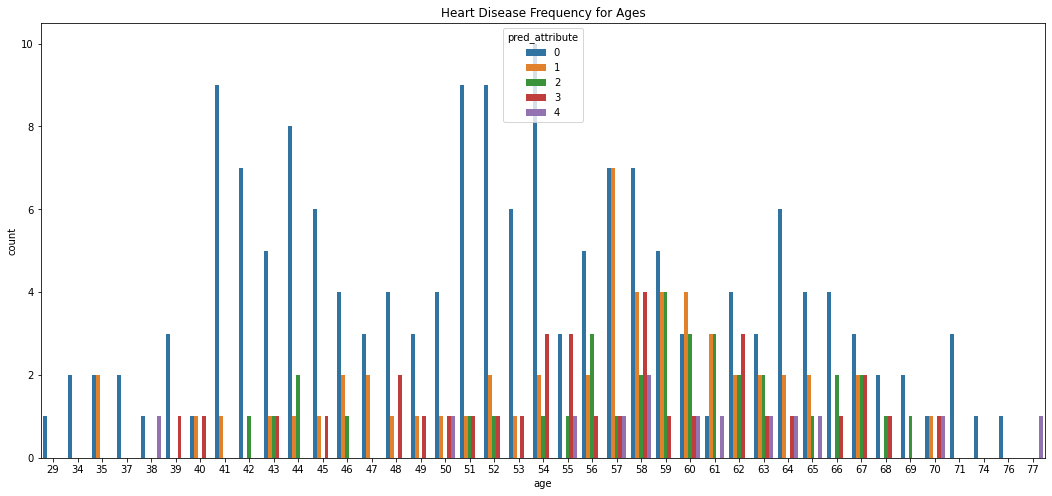

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x='age', data = df, hue="pred_attribute")
plt.title('Heart Disease Frequency for Ages')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe06fce8690>,
      dtype=object)

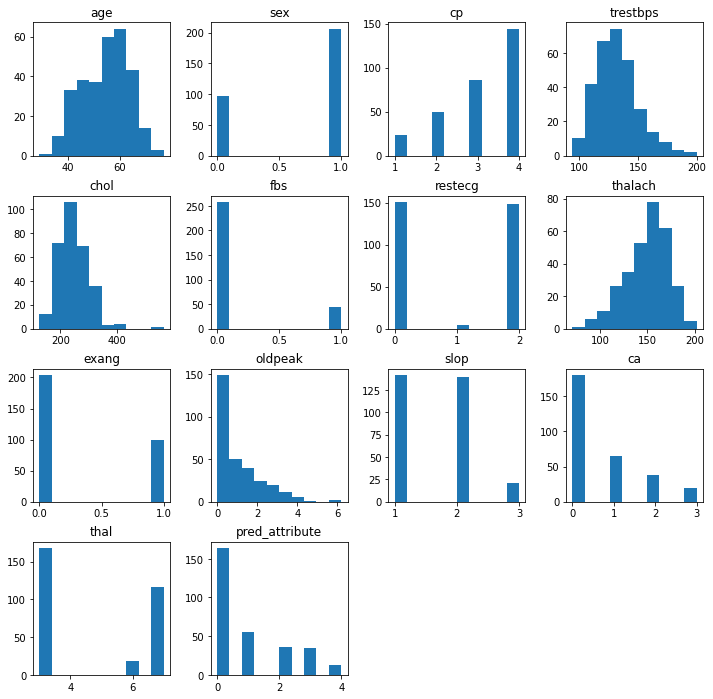

In [ ]:
df.hist(figsize=(12,12), grid=False)

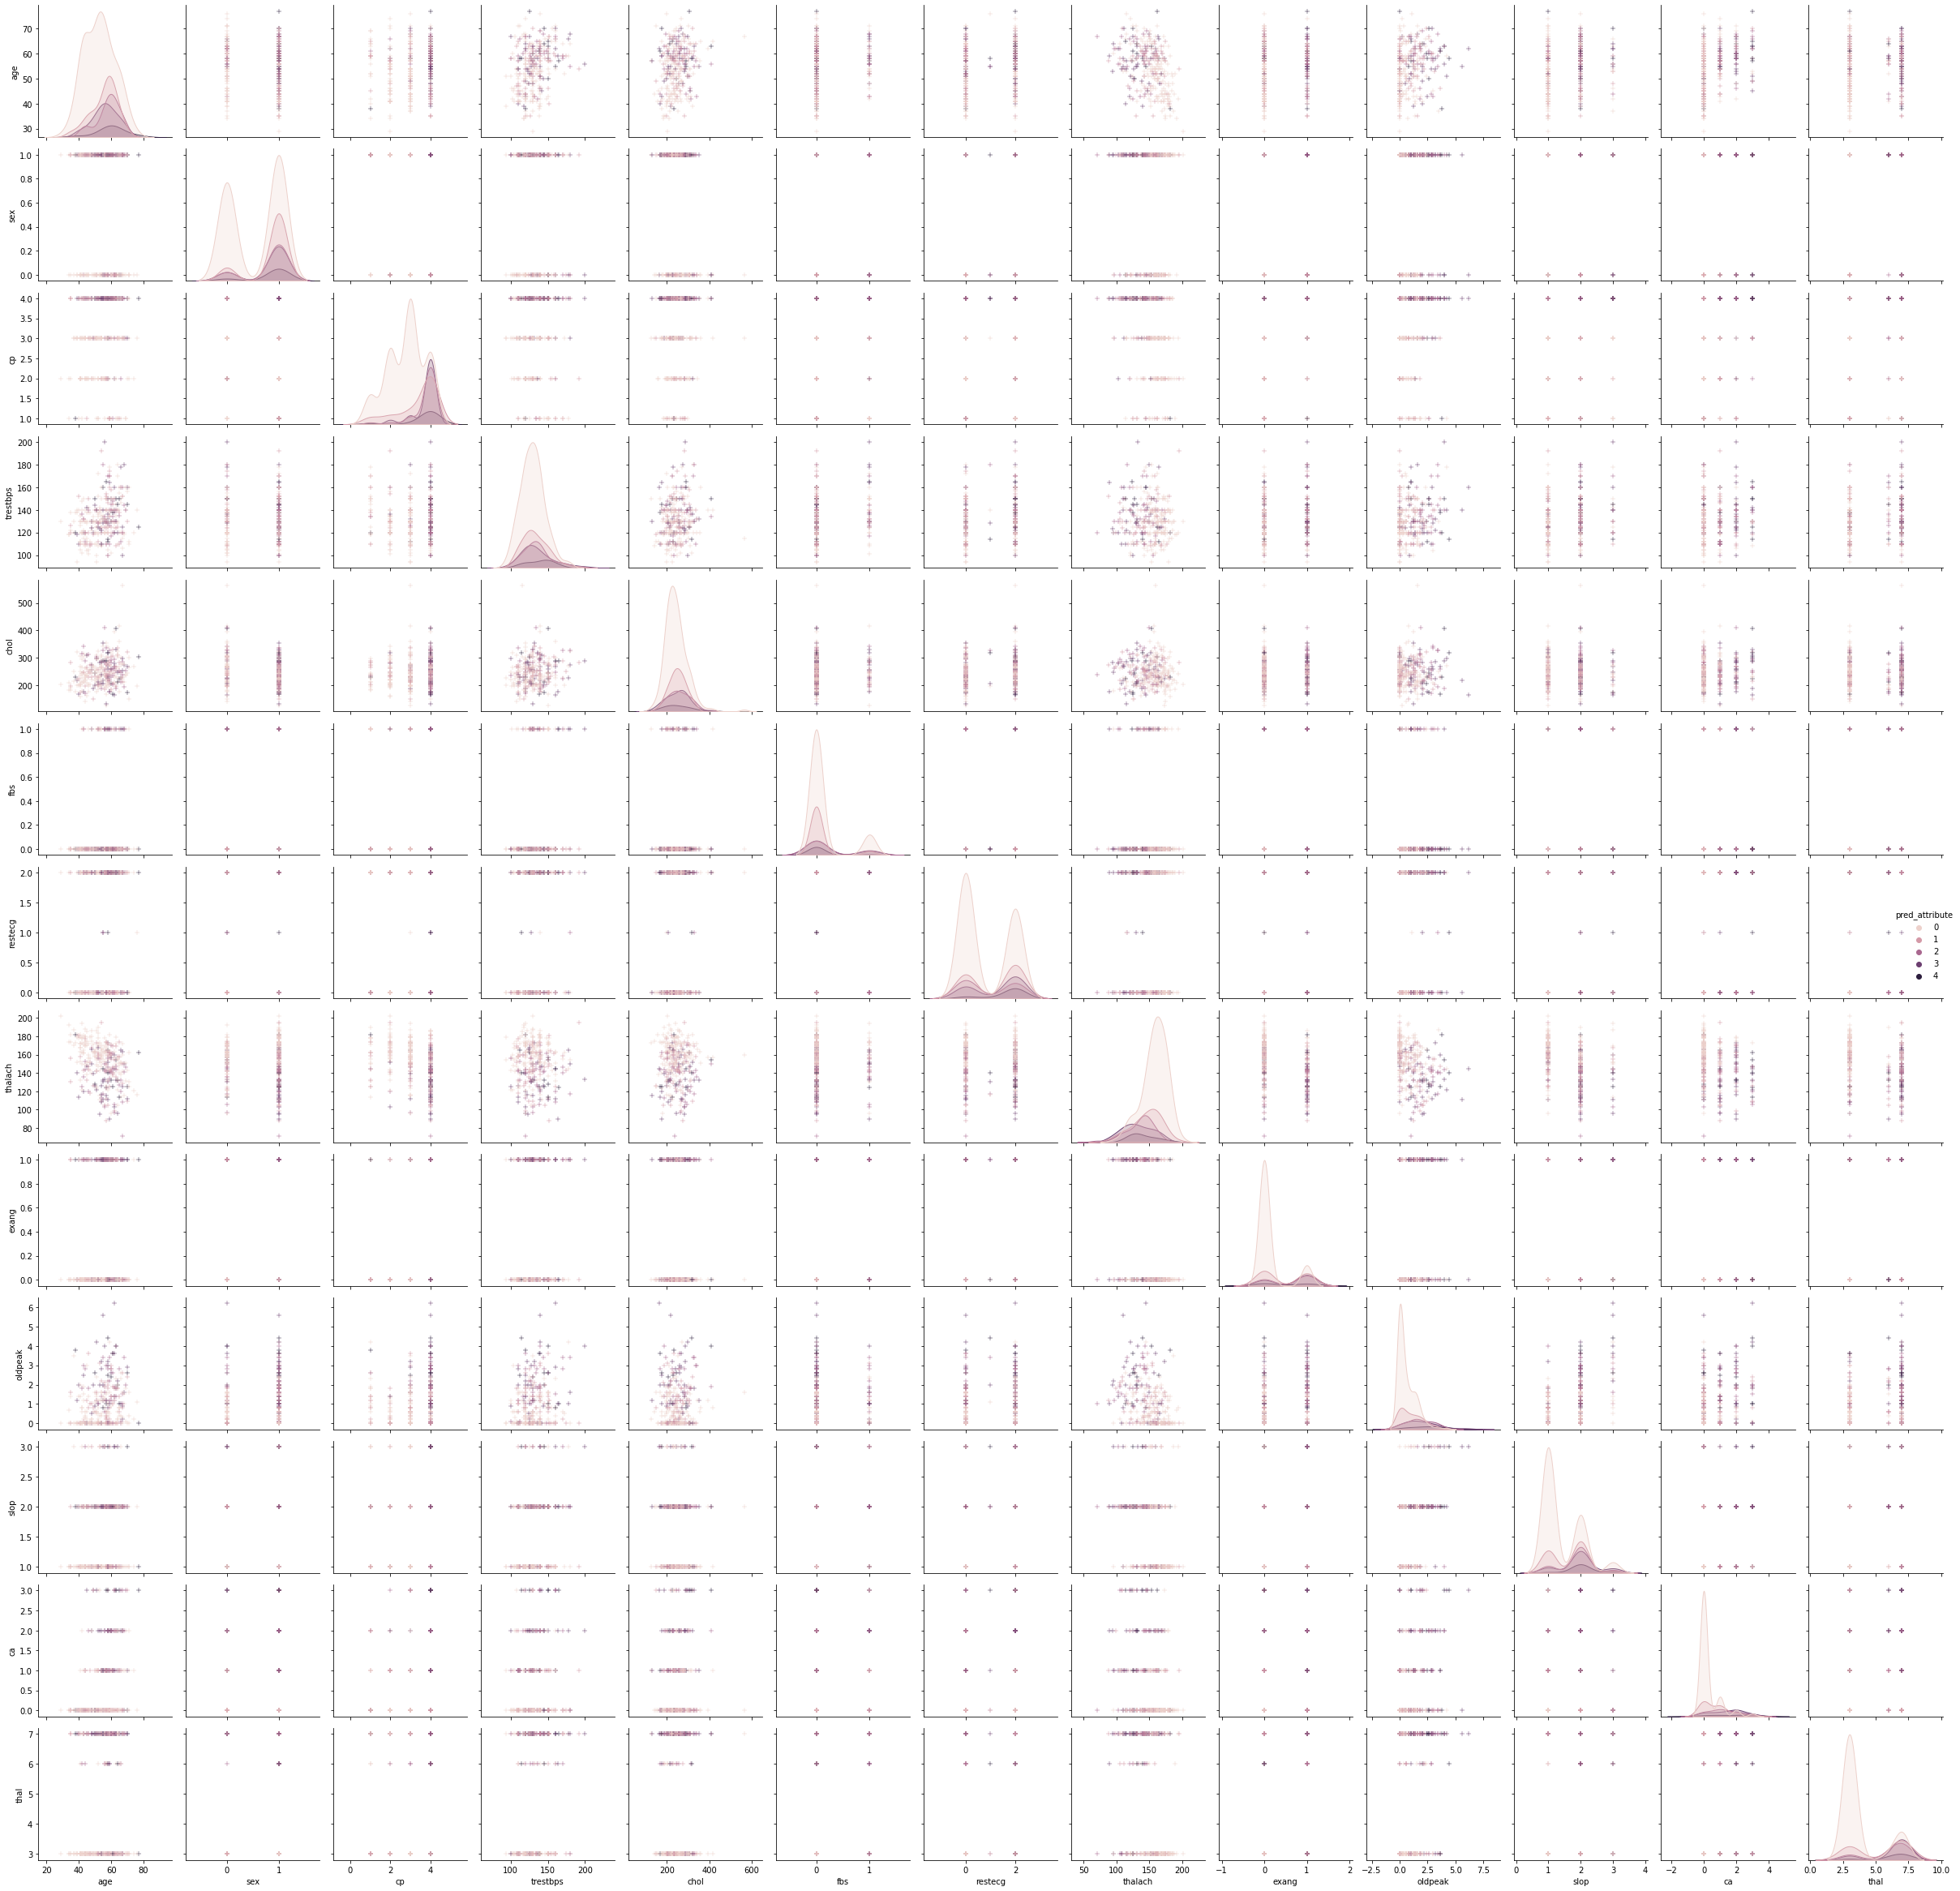

In [ ]:
sns.pairplot(df, hue='pred_attribute', markers='+')
plt.tight_layout()

In [235]:
from sklearn.model_selection import train_test_split
y = df['pred_attribute']
df.drop('pred_attribute', axis=1, inplace=True)
x = df

In [236]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [241]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial',C=1e-2,max_iter=500,tol=10)
logreg.fit(x_train, y_train)

LogisticRegression(C=0.01, max_iter=500, multi_class='multinomial', tol=10)

In [242]:
p = logreg.predict_proba(x_test)

In [243]:
from sklearn.metrics import log_loss

In [244]:
log_loss(y_test,p)

1.1901606591908185

In [251]:
pre=0
a=0
for i in range(0,10):
    x_train, x_test, y_train, y_test = train_test_split(x,y)
    logreg.fit(x_train,y_train)
    pred = logreg.predict_proba(x_test)
    pre=log_loss(y_test,p)
    a=a+pre

In [252]:
a=a/10

In [253]:
print(a)

1.6104402781739762
